<a href="https://colab.research.google.com/github/jdpatel1307/Projects/blob/main/ETL_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount(f'/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'/content/gdrive/MyDrive/Projects/Linkfire/traffic.csv')

df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   event    226278 non-null  object        
 1   date     226278 non-null  datetime64[ns]
 2   country  226267 non-null  object        
 3   city     226267 non-null  object        
 4   artist   226241 non-null  object        
 5   album    226273 non-null  object        
 6   track    226273 non-null  object        
 7   isrc     219157 non-null  object        
 8   linkid   226278 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 15.5+ MB


In [ ]:
df.isnull().sum()

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

In [ ]:
df['event'].unique()

array(['click', 'preview', 'pageview'], dtype=object)

In [ ]:
len(df['linkid'].unique())

3839

In [ ]:
#How many total pageview events did the links in the provided dataset receive in the full period?

pageview_events=(df
                .loc[df['event']=='pageview']
                ['event']
                .count())

print(f'The total number of pageview events in the dataset is {pageview_events}, which is around {round(pageview_events * 100 / 226278, 2)}% of all the events')

The total number of pageview events in the dataset is 142015, which is around 62.76% of all the events


In [ ]:
#How many total pageview events did the links in the provided dataset receive per day?

no_uniqe_days = (df
                 ['date']
                 .nunique())

print(f'The total pageview events per day is {round(pageview_events / no_uniqe_days)}')

The total pageview events per day is 20288


In [ ]:
# What about the other recorded events?

# For click event

click_events=(df
              .loc[df['event']=='click']
              ['event']
              .count())

print(f'The total number of click events in the dataset is {click_events}, which is around {round(click_events * 100 / 226278, 2)}% of all the events')
print(f'The total click events per day is {round(click_events / no_uniqe_days)}')

The total number of click events in the dataset is 55732, which is around 24.63% of all the events
The total click events per day is 7962


In [ ]:
# For preview event

preview_events=(df
                .loc[df['event']=='preview']
                ['event']
                .count())

print(f'The total number of preview events in the dataset is {preview_events}, which is around {round(preview_events * 100 / 226278, 2)}% of all the events')
print(f'The total preview events per day is {round(preview_events / no_uniqe_days)}')

The total number of preview events in the dataset is 28531, which is around 12.61% of all the events
The total preview events per day is 4076


<Axes: >

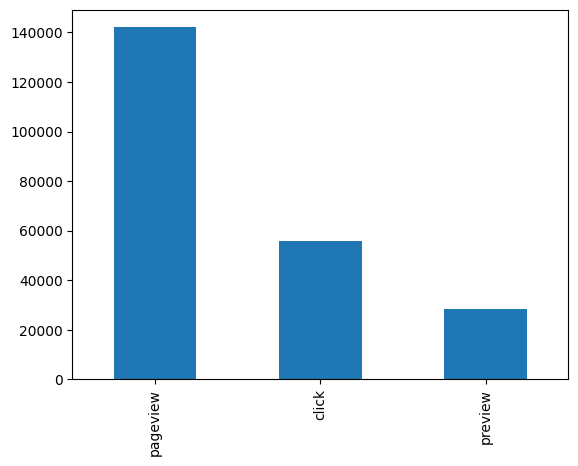

In [ ]:
(df
 ['event']
 .value_counts()
 .plot
 .bar(x='event', y='#_events'))

In [ ]:
# Which countries did the pageviews come from?
(df
 .loc[df['event']=='pageview']
 .country
 .unique())

array(['Saudi Arabia', 'United States', 'Ireland', 'United Kingdom',
       'France', 'Guatemala', 'Jordan', 'Kuwait', 'Pakistan', 'Italy',
       'Germany', 'Iraq', 'Peru', 'India', 'Nicaragua', 'Rwanda',
       'Tanzania', 'United Arab Emirates', 'Norway', 'Oman', 'Bahamas',
       'Algeria', 'Czechia', 'Mexico', 'Jamaica', 'Netherlands',
       'Colombia', 'Morocco', 'Australia', 'Myanmar', 'Uzbekistan',
       'Austria', 'Latvia', 'Turkey', 'Mauritania', 'Sri Lanka',
       'Bosnia and Herzegovina', 'Estonia', 'Nigeria', 'Bulgaria',
       'Greece', 'El Salvador', 'Philippines', 'Denmark', 'Serbia',
       'Canada', 'Spain', 'Libya', 'Palestine', 'Chad', 'Ecuador', 'Mali',
       'Romania', 'Switzerland', 'Portugal', 'Slovenia', 'Iceland',
       'Sweden', 'Bahrain', 'Egypt', 'Lithuania', 'Liberia', 'Israel',
       'Ukraine', 'Puerto Rico', 'South Africa', 'Ghana', 'Kenya',
       'Armenia', 'Nepal', 'Barbados', 'Azerbaijan', 'Qatar', 'Uganda',
       'Poland', 'Brazil', 'Guyana',

In [ ]:
# What was the overall click rate (clicks/pageviews)?

print(f'The overall click rate is {round(click_events*100/pageview_events, 2)}%')

The overall click rate is 39.24%


<Axes: xlabel='index'>

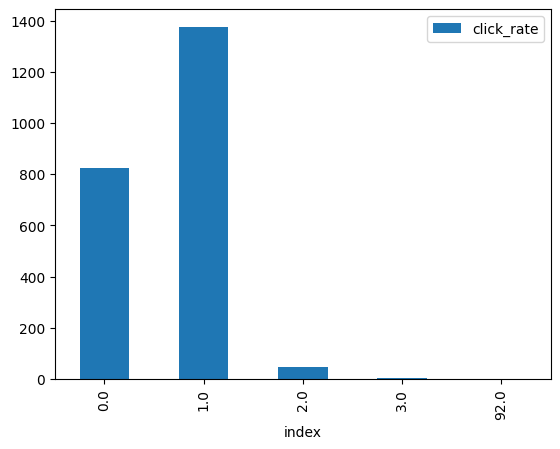

In [ ]:
# How does the clickrate distribute across different links?

no_click_event=(df
                .loc[df['event']=='click']
                .groupby('linkid')
                .event
                .count()
                .to_frame('click_events')
                .reset_index())

no_pageview_event=(df
                  .loc[df['event']=='pageview']
                  .groupby('linkid')
                  .event
                  .count()
                  .to_frame('pageview_events')
                  .reset_index())

new_df = pd.merge(no_click_event, no_pageview_event, on='linkid')

new_df['click_rate'] = round(new_df['click_events'] / new_df['pageview_events'])

new_df.set_index('linkid', inplace=True)

(new_df
 .click_rate
 .value_counts()
 .reset_index()
 .sort_values(by='index')
 .plot
 .bar(x='index', y='click_rate'))